<a href="https://colab.research.google.com/github/zhouchun0105/Fake-News-Detection-Project-BA865/blob/main/Chun_added_tfidf_trees_finetuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [2]:
! pip install spacy-universal-sentence-encoder

  Using cached spacy-3.2.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.0 MB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached thinc-8.0.13-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (628 kB)
  Using cached srsly-2.4.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (451 kB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.7
    Uninstalling spacy-2.3.7:
      Successfully uninstalled spacy-2.3.7
ERROR: pip's dependency resolver does not currently t

In [3]:
! pip3 install spacymoji==2.0.0
! pip3 uninstall spacy -y
! pip3 install spacy==2.2.2

     |████████████████████████████████| 51 kB 3.3 MB/s 
     |████████████████████████████████| 10.4 MB 6.8 MB/s 
     |████████████████████████████████| 184 kB 80.0 MB/s 
     |████████████████████████████████| 1.0 MB 70.8 MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49734 sha256=9a4e7a5fa1728076bd262cabb180c182b288288f6a84ed5c7b7ec2c590c4c9fd
  Stored in directory: /root/.cache/pip/wheels/4e/bf/6b/2e22b3708d14bf6384f862db539b044d6931bd6b14ad3c9adc
Successfully built emoji
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.2
    Uninstalling srsly-2.4.2:
      Successfully uninstalled srsly-2.4.2
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.6
    Uninstalling catalogue-2.0.6:
      Successfully uninstalled catalogue-2.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.13
    Uninstalling thinc-8.0.13:
      Successfully uninstalled thinc-8.0.13
  Attempting uninstall: spa

In [4]:
! pip install spacy-universal-sentence-encoder[multi]

  Using cached spacy-3.2.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.0 MB)
     |████████████████████████████████| 4.9 MB 5.3 MB/s 
  Using cached thinc-8.0.13-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (628 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached srsly-2.4.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (451 kB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.3.1
    Uninstalling thinc-7.3.1:
      Successfully uninstalled thinc-7.3.1
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.2
    Uninstalling spacy-2.2.2:
      Successfully uninstalled spacy-2.

In [1]:
import spacy_universal_sentence_encoder

In [2]:
# imports 
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy import cli
from spacy import displacy
import spacy_universal_sentence_encoder

try:
    from scikeras.wrappers import KerasRegressor                     
except ImportError:
    !pip install scikeras
    from scikeras.wrappers import KerasRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV

from wordcloud import WordCloud

     |████████████████████████████████| 24.8 MB 126.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.1
    Uninstalling importlib-metadata-4.11.1:
      Successfully uninstalled importlib-metadata-4.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.
finetune 0.9.0 requires scikit-learn<0.23,>=0.20.2, but you have scikit-learn 1.0.2 which is incompatible.
finetune 0.9.0 requires spacy<3.0.0,>=2.0.0, but you have spacy 3.2.2 which is incompatible.


In [3]:
# Mounting Google Drive locally
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Setup and Data Cleaning

In [4]:
# Import data 
df_fakenews_true = pd.read_csv("gdrive/Shared drives/BA865 Group Project/News _dataset/True.csv")
df_fakenews_fake = pd.read_csv("gdrive/Shared drives/BA865 Group Project/News _dataset/Fake.csv")

In [ ]:
df_fakenews_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fakenews_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_fakenews_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
df_fakenews_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
print(df_fakenews_true.shape)
print(df_fakenews_fake.shape)

(21417, 4)
(23481, 4)


In [ ]:
# checking for any null values
df_fakenews_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
# checking for any null values
df_fakenews_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

# Data Pre-Processing

In [5]:
# creating new colum 'Real/Fake', labeling the two datasets in order to merge and know which observation is real and which one is false
df_fakenews_true['real/fake'] = '1'
df_fakenews_fake['real/fake'] = '0'

In [6]:
# merging the two datasets
frames = [df_fakenews_true, df_fakenews_fake]
news_data_all = pd.concat(frames)
news_data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   real/fake  44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [ ]:
news_data_all.head()

,title,text,subject,date,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
# date column Split to see if there are seasonal trends
# splitting the Year, the Month and Day Data
date_split1 = news_data_all['date'].str.split(',', expand=True)
news_data_all['Year'] = date_split1[1]

date_split2 = news_data_all['date'].str.split(' ', expand=True)
news_data_all['Month'] = date_split2[0]
news_data_all['Day'] = date_split2[1]
news_data_all['Day'] = news_data_all['Day'].replace(',','', regex=True)


In [8]:
# dropping date column 
news_data_all = news_data_all.drop('date', axis=1)
news_data_all.head()

,title,text,subject,real/fake,Year,Month,Day
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,2017,December,31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,2017,December,29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,2017,December,31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,2017,December,30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,2017,December,29


In [ ]:
news_data_all.describe()

,title,text,subject,real/fake,Year,Month,Day
count,44898,44898,44898,44898,44853,44898,44854
unique,38729,38646,8,2,5,35,32
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,0,2017,November,13
freq,14,627,11272,23481,16701,4388,1651


In [9]:
# one-hot encoding for subject column
news_data = pd.get_dummies(news_data_all, columns=["subject"])

In [ ]:
# title and text can be two seperate variables
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   real/fake                44898 non-null  object
 3   Year                     44853 non-null  object
 4   Month                    44898 non-null  object
 5   Day                      44854 non-null  object
 6   subject_Government News  44898 non-null  uint8 
 7   subject_Middle-east      44898 non-null  uint8 
 8   subject_News             44898 non-null  uint8 
 9   subject_US_News          44898 non-null  uint8 
 10  subject_left-news        44898 non-null  uint8 
 11  subject_politics         44898 non-null  uint8 
 12  subject_politicsNews     44898 non-null  uint8 
 13  subject_worldnews        44898 non-null  uint8 
dtypes: object(6), uint8(8)
memory usage: 2

# EDA

(-0.5, 1299.5, 949.5, -0.5)

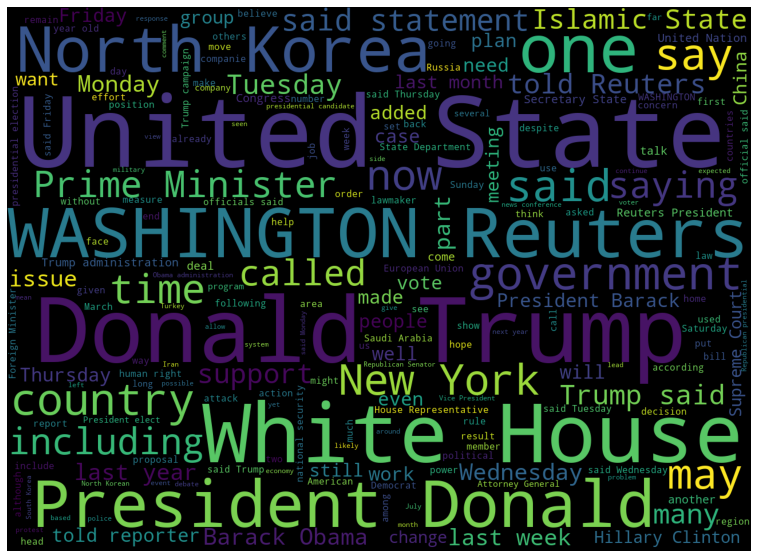

In [ ]:
# word cloud for the text real true News
text_true = pd.Series(df_fakenews_true['text'].tolist()).astype(str)

cloud = WordCloud(width=1300, height=950).generate(" ".join(text_true.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1299.5, 949.5, -0.5)

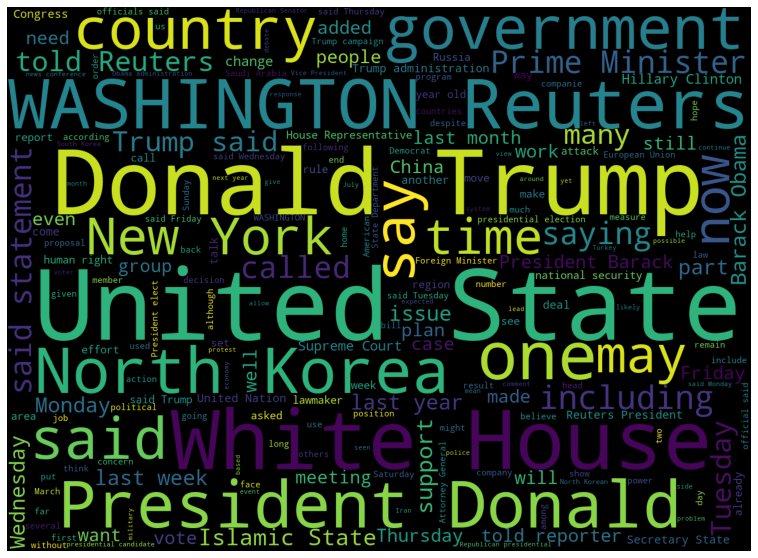

In [ ]:
# word cloud for the text false fake News
text_false = pd.Series(df_fakenews_true['text'].tolist()).astype(str)

cloud = WordCloud(width=1300, height=950).generate(" ".join(text_false.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

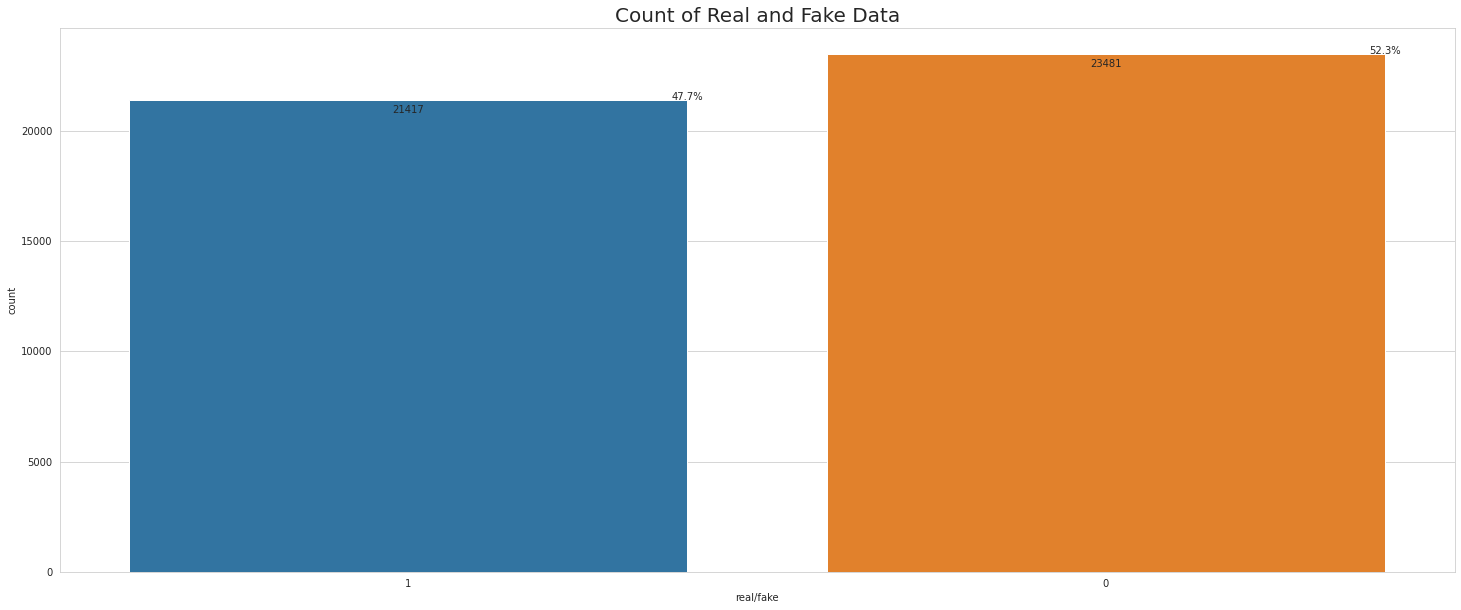

In [ ]:
total = float(len(news_data))

sns.set_style('whitegrid')
plt.figure(figsize= (25,10))
fig = sns.countplot(x='real/fake', data= news_data)
plt.title('Count of Real and Fake Data', fontsize=20)
for p in fig.patches:
    fig.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    fig.annotate(percentage, (x, y),ha='center')

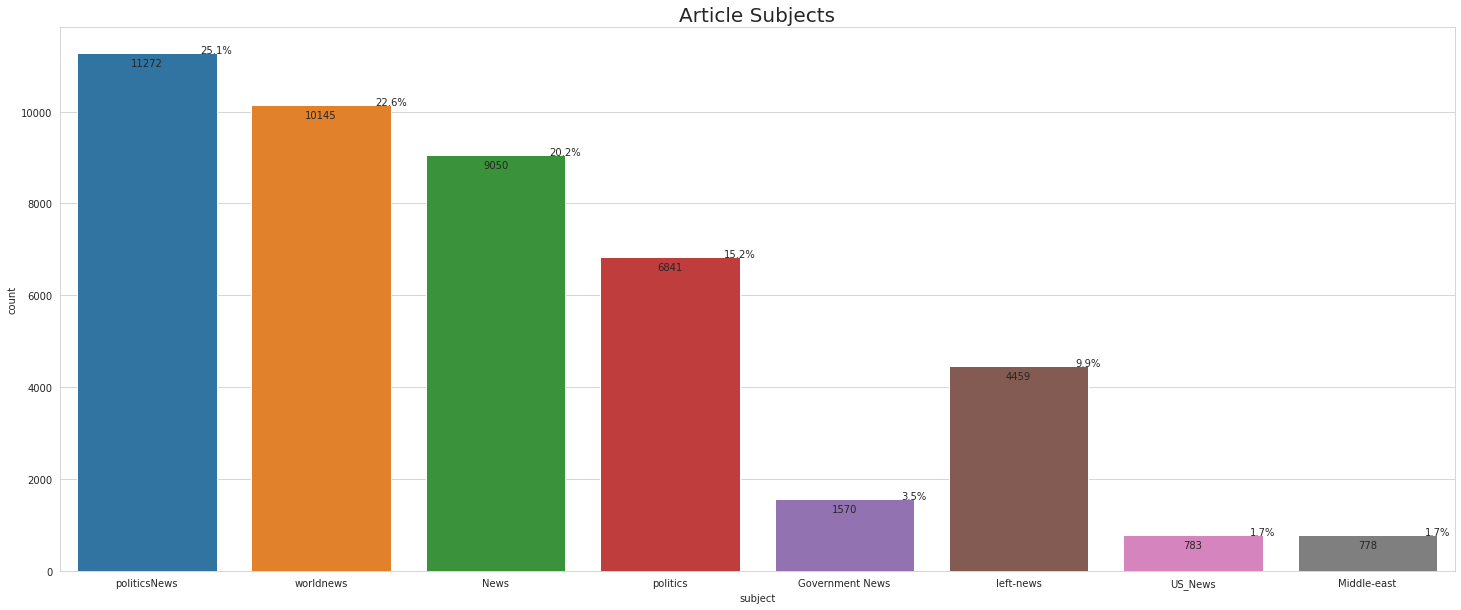

In [ ]:
#order=['unknown','Activated','Pending Activation','Inactivated','Non Standard MyChart Status','Patient Declined','Activation Code Generated, but Disabled']
total = float(len(news_data))


plt.figure(figsize= (25,10))
fig = sns.countplot(x='subject', data= news_data_all)
plt.title('Article Subjects', fontsize=20)
for p in fig.patches:
    fig.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    fig.annotate(percentage, (x, y),ha='center')


In [ ]:
count = news_data_all.groupby(['subject','real/fake']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
count

,subject,real/fake,count
0,politicsNews,1,11272
1,worldnews,1,10145
2,News,0,9050
3,politics,0,6841
4,left-news,0,4459
5,Government News,0,1570
6,US_News,0,783
7,Middle-east,0,778


In [ ]:
df_fakenews_true.groupby(['subject']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()

,subject,count
0,politicsNews,11272
1,worldnews,10145


In [ ]:
df_fakenews_fake.groupby(['subject']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()

,subject,count
0,News,9050
1,politics,6841
2,left-news,4459
3,Government News,1570
4,US_News,783
5,Middle-east,778


# Feature Engineering/Natural Language Processing 


*   TfiDf Vectorizer
*   SpaCy
*   Work Tokenizer



## Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from spacy import cli

In [ ]:
model = "en_core_web_sm"
cli.download(model)
EXCL = ['tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#text processing
nlp = spacy.load(model, disable=EXCL)
nlp.pipe_names
docs = list(nlp.pipe(news_data.text, disable=EXCL))
#getting the document vectors
dv = [doc.vector for doc in docs]
dv = np.array(dv)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

In [ ]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer((vect,news_data.text),(vect, news_data.title))

In [ ]:
ct

## SpaCy

In [ ]:
# get spacy model
model = "en_core_web_lg"
cli.download(model)

nlp = spacy.load(model)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# the pipeline
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
#add the pipe
nlp.add_pipe('universal_sentence_encoder', config={'enable_cache': False, 'model_name':'en_use_md'})

Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB



In [ ]:
type(news_data.text)

pandas.core.series.Series

In [ ]:
doc = nlp(str(news_data.text))

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 44898, dtype: object

In [ ]:
# sentence detection
for sentence in doc.sents:
  print(sentence)


0        WASHINGTON (Reuters) -
The head of a conservat...
1        WASHINGTON (Reuters) -
Transgender people will...
2        WASHINGTON (Reuters) -
The special counsel inv...
3        WASHINGTON (Reuters) -
Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) -
President Donal...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme.
...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 44898, dtype: object


In [ ]:
for token in doc: 
  print(token)

In [ ]:
#list of word tokens
[token.text for token in doc]

In [ ]:
def set_custom_boundaries(doc):
       # Adds support to use `...` as the delimiter for sentence detection
    for token in doc[:-1]:
       if token.text == '...':
         doc[token.i+1].is_sent_start = True
    return doc


In [ ]:
prefix_re = spacy.util.compile_prefix_regex(custom_nlp.Defaults.prefixes)
prefix_re

re.compile(r'^§|^%|^=|^—|^–|^\+(?![0-9])|^…|^……|^,|^:|^;|^\!|^\?|^¿|^؟|^¡|^\(|^\)|^\[|^\]|^\{|^\}|^<|^>|^_|^#|^\*|^&|^。|^？|^！|^，|^、|^；|^：|^～|^·|^।|^،|^۔|^؛|^٪|^\.\.+|^…|^\\'|^"|^”|^“|^`|^‘|^´|^’|^‚|^,|^„|^»|^«|^「|^」|^『|^』|^（|^）|^〔|^〕|^【|^】|^《|^》|^〈|^〉|^\$|^£|^€|^¥|^฿|^US\$|^C\$|^A\$|^₽|^﷼|^₴|^₠|^₡|^₢|^₣|^₤|^₥|^₦|^₧|^₨|^₩|^₪|^₫|^€|^₭|^₮|^₯|^₰|^₱|^₲|^₳|^₴|^₵|^₶|^₷|^₸|^₹|^₺|^₻|^₼|^₽|^₾|^₿|^[\u00A6\u00A9\u00AE\u00B0\u0482\u058D\u058E\u060E\u060F\u06DE\u06E9\u06FD\u06FE\u07F6\u09FA\u0B70\u0BF3-\u0BF8\u0BFA\u0C7F\u0D4F\u0D79\u0F01-\u0F03\u0F13\u0F15-\u0F17\u0F1A-\u0F1F\u0F34\u0F36\u0F38\u0FBE-\u0FC5\u0FC7-\u0FCC\u0FCE\u0FCF\u0FD5-\u0FD8\u109E\u109F\u1390-\u1399\u1940\u19DE-\u19FF\u1B61-\u1B6A\u1B74-\u1B7C\u2100\u2101\u2103-\u2106\u2108\u2109\u2114\u2116\u2117\u211E-\u2123\u2125\u2127\u2129\u212E\u213A\u213B\u214A\u214C\u214D\u214F\u218A\u218B\u2195-\u2199\u219C-\u219F\u21A1\u21A2\u21A4\u21A5\u21A7-\u21AD\u21AF-\u21CD\u21D0\u21D1\u21D3\u21D5-\u21F3\u2300-\u2307\u230C-\u231F\u2322-\u2328\u232B

In [ ]:
suffix_re = spacy.util.compile_suffix_regex(custom_nlp.Defaults.suffixes)
suffix_re

re.compile(r'…$|……$|,$|:$|;$|\!$|\?$|¿$|؟$|¡$|\($|\)$|\[$|\]$|\{$|\}$|<$|>$|_$|#$|\*$|&$|。$|？$|！$|，$|、$|；$|：$|～$|·$|।$|،$|۔$|؛$|٪$|\.\.+$|…$|\\'$|"$|”$|“$|`$|‘$|´$|’$|‚$|,$|„$|»$|«$|「$|」$|『$|』$|（$|）$|〔$|〕$|【$|】$|《$|》$|〈$|〉$|[\u00A6\u00A9\u00AE\u00B0\u0482\u058D\u058E\u060E\u060F\u06DE\u06E9\u06FD\u06FE\u07F6\u09FA\u0B70\u0BF3-\u0BF8\u0BFA\u0C7F\u0D4F\u0D79\u0F01-\u0F03\u0F13\u0F15-\u0F17\u0F1A-\u0F1F\u0F34\u0F36\u0F38\u0FBE-\u0FC5\u0FC7-\u0FCC\u0FCE\u0FCF\u0FD5-\u0FD8\u109E\u109F\u1390-\u1399\u1940\u19DE-\u19FF\u1B61-\u1B6A\u1B74-\u1B7C\u2100\u2101\u2103-\u2106\u2108\u2109\u2114\u2116\u2117\u211E-\u2123\u2125\u2127\u2129\u212E\u213A\u213B\u214A\u214C\u214D\u214F\u218A\u218B\u2195-\u2199\u219C-\u219F\u21A1\u21A2\u21A4\u21A5\u21A7-\u21AD\u21AF-\u21CD\u21D0\u21D1\u21D3\u21D5-\u21F3\u2300-\u2307\u230C-\u231F\u2322-\u2328\u232B-\u237B\u237D-\u239A\u23B4-\u23DB\u23E2-\u2426\u2440-\u244A\u249C-\u24E9\u2500-\u25B6\u25B8-\u25C0\u25C2-\u25F7\u2600-\u266E\u2670-\u2767\u2794-\u27BF\u2800-\u28FF\u2

In [ ]:
 import re

In [ ]:
infix_re = re.compile(r'''[-~]''')

In [ ]:
def customize_tokenizer(nlp):
  # Adds support to use `-` as the delimiter for tokenization
  return Tokenizer(nlp.vocab, prefix_search=prefix_re.search,
                   suffix_search=suffix_re.search,
                   infix_finditer=infix_re.finditer,
                   token_match=None)
                   


In [ ]:
from spacy.tokenizer import Tokenizer

In [ ]:
custom_nlp.tokenizer = customize_tokenizer(custom_nlp)
custom_nlp.tokenizer

In [ ]:
custom_tokenizer_about_doc = custom_nlp(doc)

In [ ]:
print([token.text for token in custom_tokenizer_about_doc])

['0', '       ', 'WASHINGTON', '(', 'Reuters', ')', '-', 'The', 'head', 'of', 'a', 'conservat', '...', '\n', '1', '       ', 'WASHINGTON', '(', 'Reuters', ')', '-', 'Transgender', 'people', 'will', '...', '\n', '2', '       ', 'WASHINGTON', '(', 'Reuters', ')', '-', 'The', 'special', 'counsel', 'inv', '...', '\n', '3', '       ', 'WASHINGTON', '(', 'Reuters', ')', '-', 'Trump', 'campaign', 'adviser', '...', '\n', '4', '       ', 'SEATTLE', '/', 'WASHINGTON', '(', 'Reuters', ')', '-', 'President', 'Donal', '...', '\n                               ', '...', '                       \n', '23476', '   ', '21st', 'Century', 'Wire', 'says', 'As', '21WIRE', 'reported', 'earl', '...', '\n', '23477', '   ', '21st', 'Century', 'Wire', 'says', 'It', 's', 'a', 'familiar', 'theme', '.', '...', '\n', '23478', '   ', 'Patrick', 'Henningsen', ' ', '21st', 'Century', 'WireRemember', '...', '\n', '23479', '   ', '21st', 'Century', 'Wire', 'says', 'Al', 'Jazeera', 'America', 'will', '...', '\n', '23480', 

In [ ]:
### stop words 
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)

326

In [ ]:
for stop_word in list(spacy_stopwords)[:10]:
  print(stop_word)

beside
below
please
seeming
and
myself
it
nevertheless
noone
or


In [ ]:
for token in doc:
  if not token.is_stop:
    print(token)

In [ ]:
about_no_stopword_doc = [token for token in doc if not token.is_stop]
print (about_no_stopword_doc)

[0,        , WASHINGTON, (, Reuters, ), -, head, conservat, ..., 
, 1,        , WASHINGTON, (, Reuters, ), -, Transgender, people, ..., 
, 2,        , WASHINGTON, (, Reuters, ), -, special, counsel, inv, ..., 
, 3,        , WASHINGTON, (, Reuters, ), -, Trump, campaign, adviser, ..., 
, 4,        , SEATTLE, /, WASHINGTON, (, Reuters, ), -, President, Donal, ..., 
                               , ...,                        
, 23476,    , 21st, Century, Wire, says, 21WIRE, reported, earl, ..., 
, 23477,    , 21st, Century, Wire, says, s, familiar, theme, ., ..., 
, 23478,    , Patrick, Henningsen,  , 21st, Century, WireRemember, ..., 
, 23479,    , 21st, Century, Wire, says, Al, Jazeera, America, ..., 
, 23480,    , 21st, Century, Wire, says, 21WIRE, predicted, ..., 
, :, text, ,, Length, :, 44898, ,, dtype, :, object]


In [ ]:
## lemmatization  
for token in doc:
  print (token, token.lemma_)

In [ ]:
## word frequency 
from collections import Counter

In [ ]:
# Remove stop words and punctuation symbols
words = [token.text for token in doc
         if not token.is_stop and not token.is_punct]

In [ ]:
word_freq = Counter(words)
word_freq

In [ ]:
# 5 commonly occurring words with their frequencies
common_words = word_freq.most_common(5)
print (common_words)

[('\n', 9), ('       ', 5), ('WASHINGTON', 5), ('Reuters', 5), ('   ', 5)]


In [ ]:
# Unique words
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print (unique_words)


['0', 'head', 'conservat', '1', 'Transgender', 'people', '2', 'special', 'counsel', 'inv', '3', 'Trump', 'campaign', 'adviser', '4', 'SEATTLE', 'President', 'Donal', '\n                               ', '                       \n', '23476', 'reported', 'earl', '23477', 's', 'familiar', 'theme', '23478', 'Patrick', 'Henningsen', ' ', 'WireRemember', '23479', 'Al', 'Jazeera', 'America', '23480', 'predicted', 'text', 'Length', '44898', 'dtype', 'object']


In [ ]:
len(unique_words)

43

In [ ]:
### part of speech tagging
for token in doc:
  print (token, token.tag_, token.pos_, spacy.explain(token.tag_))

In [ ]:
nouns = []
adjectives = []
for token in doc:
  if token.pos_ == 'NOUN':
    nouns.append(token)
  if token.pos_ == 'ADJ':
    adjectives.append(token)

print(nouns)
print(adjectives)

[head, conservat, Transgender, people, counsel, Trump, campaign, adviser, theme, Name, text, Length, dtype, object]
[special, 21st, 21st, familiar, 21st, 21st, 21st]


In [ ]:
from spacy import displacy

In [ ]:
about_doc = nlp(str(news_data.text))

In [ ]:
displacy.serve(about_doc, style='dep')


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
### preprocessing functions
def is_token_allowed(token):
  '''only allow valid tokens which are not stop wordsand punctuation symbols.'''
  if (not token or not token.string.strip() or token.is_stop or token.is_punct):
      return False 
  return True 

def preprocess_token(token): 
  #reduce token to its lowercase lemma form 
  return token.lemma_.strip().lower


In [ ]:
# A preprocessing function converts text to an analyzable format.
# complete_filtered_tokens = [preprocess_token(token) for token in about_doc if is_token_allowed(token)]
# complete_filtered_tokens

# Finetune Transformer Models

In [5]:
!pip install git+https://github.com/IndicoDataSolutions/finetune.git

  Cloning https://github.com/IndicoDataSolutions/finetune.git to /tmp/pip-req-build-ug9pioek
  Running command git clone -q https://github.com/IndicoDataSolutions/finetune.git /tmp/pip-req-build-ug9pioek
     |████████████████████████████████| 7.1 MB 5.3 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
  Using cached spacy-2.3.7-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.4 MB)
     |████████████████████████████████| 6.4 MB 66.2 MB/s 
     |████████████████████████████████| 1.2 MB 72.5 MB/s 
     |████████████████████████████████| 1.1 MB 64.7 MB/s 
     |████████████████████████████████| 449 kB 86.0 MB/s 
     |████████████████████████████████| 2.1 MB 72.1 MB/s 
     |████████████████████████████████| 895 kB 67.7 MB/s 
     |████████████████████████████████| 3.3 MB 74.9 MB/s 
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached srsly-1.0.5-cp37-cp37m-manylinux2014_x86_64.whl (184 kB)
  Using cached thinc-7.4.5-cp37-cp37m-manylinux20

In [10]:
from finetune.base_models import BERT
from finetune import Classifier
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
/usr/local/lib/python3.7/dist-packages/finetune/custom_ops/indico_tf_ops/python/indico_ops.py:29: UserWarning: Cuda appears to be available but cannot load the kernels
  warnings.warn("Cuda appears to be available but cannot load the kernels")


In [11]:
model = Classifier(base_model=BERT, low_memory_mode=True, n_epochs=3, batch_size=100)

Downloading: bert_small_cased-v2.jl


100%|██████████| 436M/436M [00:07<00:00, 58.6MiB/s]


Downloading: vocab.txt


100%|██████████| 213k/213k [00:00<00:00, 1.84MiB/s]
INFO:finetune:Saving tensorboard output to /tmp/Finetunekfjzzx7t
INFO:finetune: Visible GPUs: {}
/usr/local/lib/python3.7/dist-packages/finetune/config.py:46: UserWarning: Failed to find available GPUS.  Falling back to CPU only mode.
  warnings.warn("Failed to find available GPUS.  Falling back to CPU only mode.")


In [12]:
X = news_data.text.to_list()
y = news_data["real/fake"]

In [ ]:
# finetune the model
model.fit(X, y)

Epoch 1/3:   1%|          | 1122/94957 [13:50<22:41:57,  1.15it/s]

In [ ]:
preds = model.predict(news_data.text.to_list())

In [ ]:
news_data['pred'] = preds

In [ ]:
cr = metrics.classification_report(news_data["real/fake"], preds)
print(cr)

# Decision Tree

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
steps = [("vec", TfidfVectorizer()),
         ("clf", DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30))]

pipe_tree = Pipeline(steps)

In [ ]:
pipe_tree.fit(X, y)

In [ ]:
news_data['preds3'] = pipe_tree.predict(X)

In [ ]:
cr3 = metrics.classification_report(news_data["real/fake"], news_data.preds3)
print(cr3)

# Deep Learning/Tenserflow